## Unzip data, clone torchvision, and imports libs

In [1]:
# Unzip the train data zipped file located in google drive
! unzip "/content/drive/MyDrive/Colab Notebooks/training.zip"

Archive:  /content/drive/MyDrive/Colab Notebooks/training.zip
 extracting: training/labels.json    
 extracting: training/data/media-36-2022-11-22-20221122_134812.jpg  
 extracting: training/data/media-36-2022-11-22-20221122_134815.jpg  
 extracting: training/data/media-36-2022-11-22-20221122_134817.jpg  
 extracting: training/data/media-36-2022-11-22-20221122_134848.jpg  
 extracting: training/data/media-36-2022-11-22-20221122_134911.jpg  
 extracting: training/data/media-36-2022-11-22-20221122_134915.jpg  
 extracting: training/data/media-36-2022-11-22-20221122_134952.jpg  
 extracting: training/data/media-36-2022-11-22-20221122_135027.jpg  
 extracting: training/data/media-36-2022-11-22-20221122_135032.jpg  
 extracting: training/data/media-36-2022-11-22-20221122_135111.jpg  
 extracting: training/data/media-36-2022-11-22-20221122_135125.jpg  
 extracting: training/data/media-36-2022-11-22-20221122_135221.jpg  
 extracting: training/data/media-36-2022-11-22-20221122_135224.jpg  
 ex

In [2]:
# clone torchvision 
!git clone https://github.com/pytorch/vision.git
!git checkout v0.3.0

Cloning into 'vision'...
remote: Enumerating objects: 277579, done.
remote: Counting objects: 100% (16894/16894), done.
remote: Compressing objects: 100% (818/818), done.
remote: Total 277579 (delta 16115), reused 16788 (delta 16043), pack-reused 260685
Receiving objects: 100% (277579/277579), 555.29 MiB | 51.09 MiB/s, done.
Resolving deltas: 100% (253787/253787), done.
fatal: not a git repository (or any of the parent directories): .git


In [3]:
# copy required modules
!cp vision/references/detection/utils.py ./
!cp vision/references/detection/transforms.py ./
!cp vision/references/detection/coco_eval.py ./
!cp vision/references/detection/engine.py ./
!cp vision/references/detection/coco_utils.py ./

In [4]:

# for ignoring warnings
import warnings
warnings.filterwarnings('ignore')


## Load labels and check the data

length of train dataset =  4085 

(300, 300, 3) 
 {'boxes': tensor([[173.6719, 182.9167, 179.0625, 195.8333],
        [184.6875, 183.7500, 192.1875, 198.3333],
        [225.9375, 262.0833, 258.5156, 300.0000],
        [271.6406, 260.4167, 298.8281, 289.1667]]), 'labels': tensor([2, 4, 2, 4]), 'area': tensor([  69.6289,  109.3750, 1235.2535,  781.6406]), 'iscrowd': tensor([0, 0, 0, 0]), 'image_id': tensor([10])}


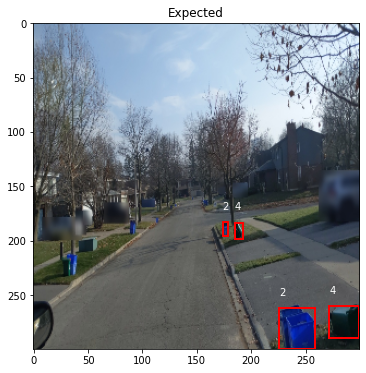

In [5]:
from myutils import *
import matplotlib.pyplot as plt

# defining the files directory and testing directory
images_dir = './training/data'

labels_df, labels_df_train, labels_df_test, label_map =\
     create_label_df(path_to_labels = "./training/labels.json", seednum=42)
# use our dataset and defined transformations
dataset       = CostumeImageDataset(images_dir, 300, 300, labels_df_train, label_map, transforms = None)
dataset_test  = CostumeImageDataset(images_dir, 300, 300, labels_df_test , label_map, transforms = get_transform(train=False))

print('length of train dataset = ', len(dataset), '\n')

# getting the image and target for a test index.  Feel free to change the index.
img, target = dataset[10]
print(img.shape, '\n',target)

# plotting the image with bboxes. Feel free to change the index
plot_img_bbox(img, target, pred=None)

In [6]:
labels_df.sample(5)

,file_name,bbox,area,iscrowd,label,label_id
2758,media-68-2022-11-23-20221123_17585.jpg,"[954.0, 605.0, 118.0, 108.0]",12744.0,0,Blue Bin,2
5075,media-75-2022-11-24-20221124_124628.jpg,"[844.0, 535.0, 46.0, 20.0]",920.0,0,Green Cart,4
1101,media-41-2022-11-25-20221125_203533.jpg,"[744.0, 500.0, 21.0, 30.0]",630.0,0,Green Cart,4
1452,media-36-2022-11-23-20221123_123233.jpg,"[676.0, 508.00000000000006, 39.0, 21.0]",819.0,0,Blue Bin,2
5317,media-75-2022-11-25-20221125_19235.jpg,"[875.0, 475.0, 32.0, 50.0]",1600.0,0,Garbage Bin,3


In [7]:
# check iscrowd column
labels_df.iscrowd.unique()

array([0])

In [8]:
# check for any null values
print(labels_df.isna().sum())

file_name    0
bbox         0
area         0
iscrowd      0
label        0
label_id     0
dtype: int64


In [9]:
# check number of sample per each class
labels_df.label.value_counts()

Blue Bin                        2592
Green Cart                      1523
Black Garbage Bag                706
Garbage Bin                      422
Paper Bag                        149
Recycling Bag                     33
Advanced Green When Flashing      22
Name: label, dtype: int64

In [10]:
# check train and test have similar class ratios
print(labels_df_train.label.value_counts()/labels_df_train.label.count())
print(labels_df_test.label.value_counts()/labels_df_test.label.count())

Blue Bin                        0.477846
Green Cart                      0.279315
Black Garbage Bag               0.135129
Garbage Bin                     0.072950
Paper Bag                       0.025459
Recycling Bag                   0.005141
Advanced Green When Flashing    0.004162
Name: label, dtype: float64
Blue Bin                        0.469897
Green Cart                      0.280470
Black Garbage Bag               0.113069
Garbage Bin                     0.091043
Paper Bag                       0.033040
Recycling Bag                   0.008811
Advanced Green When Flashing    0.003671
Name: label, dtype: float64


 - It's clear that we are dealing with imbalanced data set. To handle this there different appraoches such as Hard Sampling (droping some of majority labels), Generative Methods (generate aritificial sampale using generative models, for example in Adversarial Fast RCNN), and Soft Sampling (adjust the contribution of each sample, for example using Focal Loss). In this case we try to train a RetinaNet models which used Focal Loss and showed great performance in the literature. However, it might not be as fast as other alternatives such as YOLO family models or FRCNN in terms of trainig speed and inference time. 



## Training 

Model training task is performed through main.py file.

In [16]:
# fine-tune a RetinaNet model
!python main.py --seed 42 --epochs 15 --batch-size 8 --basemodel 'retinanet' --learning-rate 0.005 --step-size 5 --gamma 0.5

- label_df and label_map are created.
- data loaders are created.
- model training started.
Epoch: [0]  [  0/511]  eta: 0:28:46  lr: 0.000015  loss: 2.3180 (2.3180)  classification: 1.2016 (1.2016)  bbox_regression: 1.1164 (1.1164)  time: 3.3780  data: 0.4204  max mem: 3884
Epoch: [0]  [100/511]  eta: 0:01:35  lr: 0.000994  loss: 1.8623 (1.9145)  classification: 1.1586 (1.1738)  bbox_regression: 0.6897 (0.7407)  time: 0.1987  data: 0.0195  max mem: 4132
Epoch: [0]  [200/511]  eta: 0:01:07  lr: 0.001974  loss: 1.8237 (1.8569)  classification: 1.1551 (1.1486)  bbox_regression: 0.6676 (0.7083)  time: 0.2003  data: 0.0207  max mem: 4132
Epoch: [0]  [300/511]  eta: 0:00:44  lr: 0.002953  loss: 1.8287 (1.8338)  classification: 1.1476 (1.1382)  bbox_regression: 0.6538 (0.6956)  time: 0.2021  data: 0.0219  max mem: 4132
Epoch: [0]  [400/511]  eta: 0:00:23  lr: 0.003932  loss: 1.7814 (1.8284)  classification: 1.1294 (1.1408)  bbox_regression: 0.6420 (0.6876)  time: 0.2003  data: 0.0210  max mem

In [29]:
# fine-tune a Faster RCNN model
!python main.py --seed 42 --epochs 10 --batch-size 5 --basemodel 'frcnn' --learning-rate 0.01 --step-size 3 --gamma 0.1

- label_df and label_map are created.
- data loaders are created.
- model training started.
Epoch: [0]  [  0/817]  eta: 0:43:45  lr: 0.000022  loss: 2.6942 (2.6942)  loss_classifier: 1.9447 (1.9447)  loss_box_reg: 0.0007 (0.0007)  loss_objectness: 0.6880 (0.6880)  loss_rpn_box_reg: 0.0607 (0.0607)  time: 3.2140  data: 0.3039  max mem: 3235
Epoch: [0]  [100/817]  eta: 0:02:21  lr: 0.001247  loss: 0.3547 (0.9446)  loss_classifier: 0.1376 (0.5185)  loss_box_reg: 0.0740 (0.0418)  loss_objectness: 0.1052 (0.3337)  loss_rpn_box_reg: 0.0459 (0.0506)  time: 0.1672  data: 0.0116  max mem: 3500
Epoch: [0]  [200/817]  eta: 0:01:52  lr: 0.002471  loss: 0.3753 (0.6695)  loss_classifier: 0.1663 (0.3434)  loss_box_reg: 0.1311 (0.0822)  loss_objectness: 0.0484 (0.1999)  loss_rpn_box_reg: 0.0297 (0.0439)  time: 0.1663  data: 0.0117  max mem: 3500
Epoch: [0]  [300/817]  eta: 0:01:31  lr: 0.003695  loss: 0.4497 (0.5825)  loss_classifier: 0.1870 (0.2885)  loss_box_reg: 0.1637 (0.1055)  loss_objectness: 0.

## Testing/comparing models

Predictions for RetinaNet before NMS and filtering low confidence predictions:


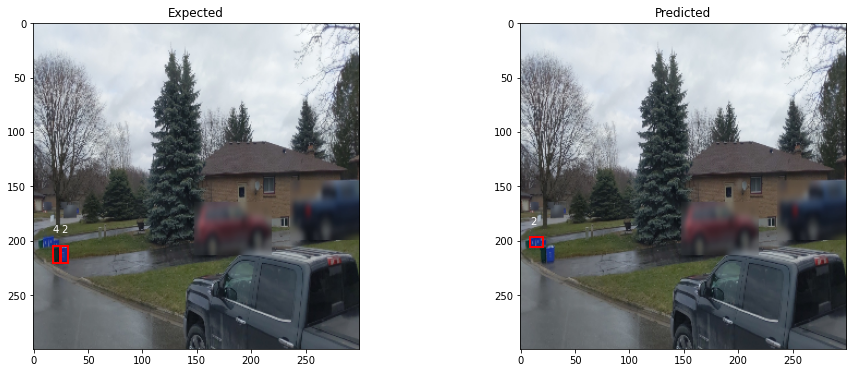



Predictions for RetinaNet After NMS and filtering low confidence predictions:


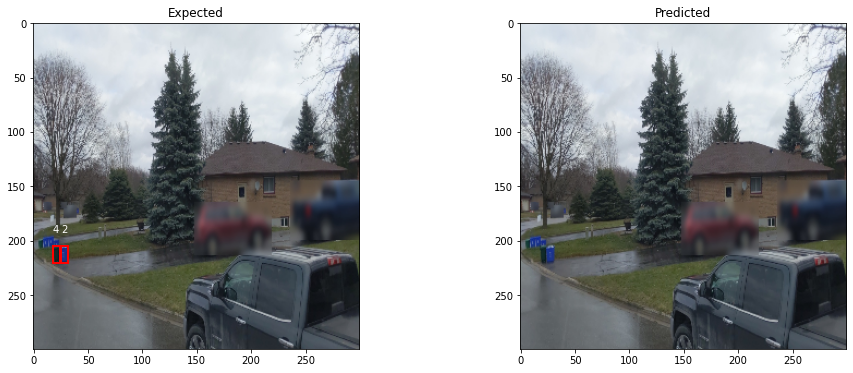



Predictions for FRCNN before NMS and filtering low confidence predictions:


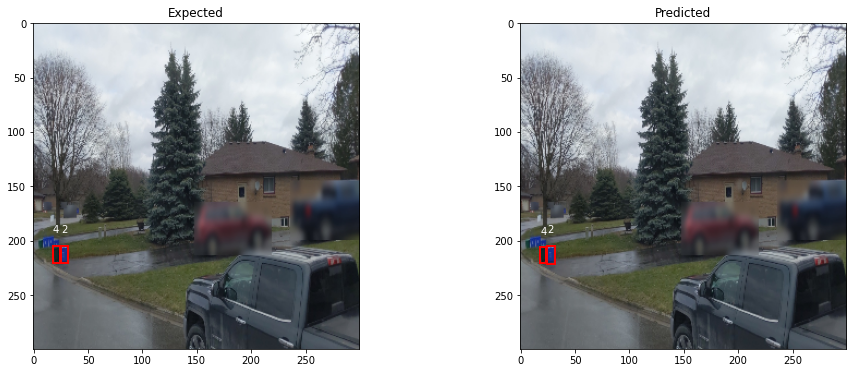



Predictions for FRCNN After NMS and filtering low confidence predictions:


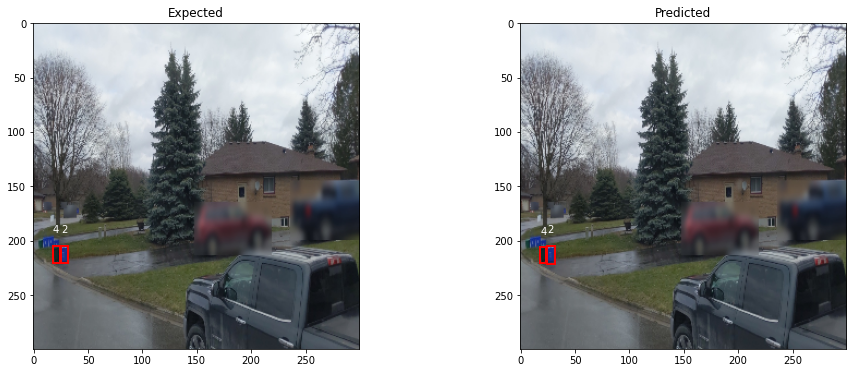

In [39]:
from myutils import *
import torch, torchvision, numpy as np

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# pick one image from the test set
id = np.random.randint(0, len(labels_df_test)-1, 1)[0]
img, target = dataset_test[id]

# load and put the models in evaluation mode
retina = get_object_detection_model(num_classes=7, basemodel='retinanet')
frcnn  = get_object_detection_model(num_classes=7, basemodel='frcnn')
retina.load_state_dict(torch.load("models/retinanet_e14.pt"))
frcnn.load_state_dict(torch.load("models/frcnn_e9.pt"))

# move model to the right device
retina.to(device)
frcnn.to(device)
retina.eval()
frcnn.eval()

with torch.no_grad():
    retina_pred = retina([img.to(device)])[0]
    frcnn_pred = frcnn([img.to(device)])[0]
# apply NMS method and filter low confidence predictions
retina_pred_corr = filter_prediction(retina_pred, iou_thresh=0.3, score_thresh=0.5)
frcnn_pred_corr  = filter_prediction(frcnn_pred , iou_thresh=0.3, score_thresh=0.5)

print("Predictions for RetinaNet before NMS and filtering low confidence predictions:")
plot_img_bbox(torch_to_pil(img), target, retina_pred, figsize=(16,6))
print('\n')
print("Predictions for RetinaNet After NMS and filtering low confidence predictions:")
plot_img_bbox(torch_to_pil(img), target, retina_pred_corr, figsize=(16,6))
print('\n')
print("Predictions for FRCNN before NMS and filtering low confidence predictions:")
plot_img_bbox(torch_to_pil(img), target, frcnn_pred, figsize=(16,6))
print('\n')
print("Predictions for FRCNN After NMS and filtering low confidence predictions:")
plot_img_bbox(torch_to_pil(img), target, frcnn_pred_corr, figsize=(16,6))

## Ways to Improve performance

- **Hyperparameter fine-tunning**: for this task, due to limited time and slow training process, it was not possible to find the best hyper parameters and train models for many epochs. Consequently, it is very likely that the models are underfitted. Based on other tasks, it is expected that with better hypertunning RetinaNet would provide better results in terms of accuracy. 
- **Data augmentation methods**: investigating other data augmentation methods such as generative model may lead to improved performance. However, it is always better to gather more real data than creating artificial ones.
- **Time/location based train/test split**: since thie data set is frames from a video, there are many frames with very similar background and object. As a result a better appoach would be spliting the data based on time (e.g. first hour for training, next hour for test) or location (e.g. video from street A for training, video from street B for test). Also, note that here I only had train and test data sets due to limited data points. In practice, there should be train/val/test. 
- **Better labeling**: Based on training samples, it can be seen that not all objects of interests in the frames are labeled, which can confuse the model. However, FRCNN model turns was able to to detect some unlabeled objects in the test samples. Such model can be used for human-in-the-loop training/labeling to provide more labeled data faster.
